In [2]:
# imports
import numpy as np
from sklearn.naive_bayes import GaussianNB

# import local module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from SciKit.UdacityMlCourse.lib.bayesExerciseUtil import makeDataExample01

In [3]:
# add in dummy data
features = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
labels = np.array([1, 1, 1, 2, 2, 2])



In [4]:
# create the NB model and fit it
clf = GaussianNB()
clf.fit(features, labels)



GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
# try predict on test data
test = np.array([[-0.8, -1]])
testPredict = clf.predict(test)

print("the prediction for {} was: {}".format(test, testPredict))


In [6]:
# test the data import
X_train, X_test, y_train, y_test = makeDataExample01(10, 0.8)
print("Train X is {} and test X is{}".format(X_train, X_test))
print("Train y is {} and test y is{}".format(y_train, y_test))


Train X is [[0.4523795535098186, 0.09412345622921847], [0.559772386080496, 0.3034012626245255], [0.9242105840237294, 0.0906705374918394], [0.4656500700997733, 0.8096445343671775], [0.5078412730622711, 0.6934384825412391], [0.587384828849897, 0.041880336369846005], [0.18466034385487662, 0.9821934207987782], [0.5119086390418055, 0.9647577811255668]] and test X is[[0.6298827202168019, 0.6539225335338404], [0.7929768725199526, 0.6155627045785708]]
Train y is [0, 0, 1.0, 1.0, 1, 0, 1.0, 1.0] and test y is[1, 1]


In [18]:
# get new test/train data
feature_train, feature_test, label_train, label_test = makeDataExample01(1000, 0.75)

# get the new model
model = GaussianNB()
model.fit(feature_train, label_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0, 0.5, 'grade')

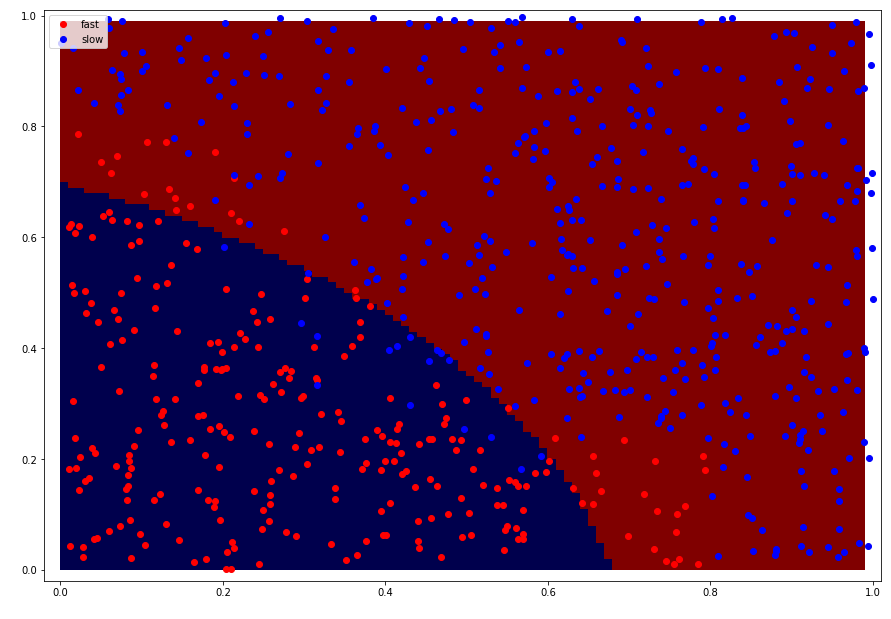

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from SciKit.UdacityMlCourse.lib.bayesExerciseUtil import get_plot_data


# set the plot boundaries
x_min = 0.0; x_max = 1.0; y_min = 0.0; y_max = 1.0
step_size = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# get new plot data
grade_sig, bumpy_sig, grade_bkg, bumpy_bkg = get_plot_data(feature_train, label_train)

# put in the boundary line
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# set the scatter plot
figure = plt.figure(figsize= (15, 10.5))
plt.xlim(xx.min()-0.02, xx.max()+0.02)
plt.ylim(yy.min()-0.02, yy.max()+0.02)
plt.pcolormesh(xx, yy, Z, cmap = pl.cm.seismic)
plt.scatter(grade_sig, bumpy_sig, color = "r", label = "fast")
plt.scatter(grade_bkg, bumpy_bkg, color = "b", label = "slow")

# legend for plot
plt.legend()
plt.xlabel("bumpiness", color = "w")
plt.ylabel("grade", color = "w")


In [20]:
# get the bayes classifier accuracy
# import
from sklearn.metrics import accuracy_score

# test the model
test_prediction = model.predict(feature_test)
model_accuracy = accuracy_score(test_prediction, label_test)

# print
print("the Gaussian NB model accuracy is: {}".format(model_accuracy))

the Gaussian NB model accuracy is: 0.904
